## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [1]:
import pandas as pd
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


For convenience, we'll further process this dataset by shortening the column names:

In [2]:
data.columns = ['Total','East', 'West']


Now let's take a look at the summary statistics for this data:

In [3]:
data.dropna().describe()

,Total,East,West
count,135593.000000,135593.000000,135593.000000
mean,113.146158,51.605415,61.540743
std,143.810041,66.313631,89.549971
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas.util.testing as tm

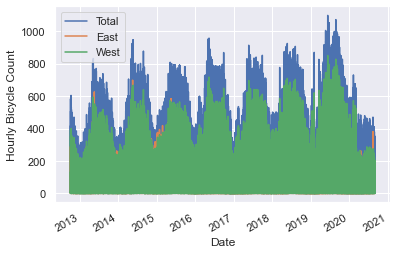

In [6]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by month:

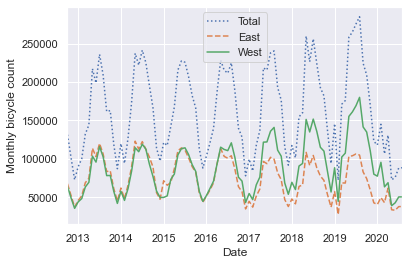

In [9]:
weekly = data.resample('M').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Monthly bicycle count');

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

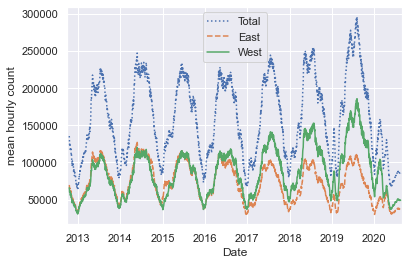

In [10]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

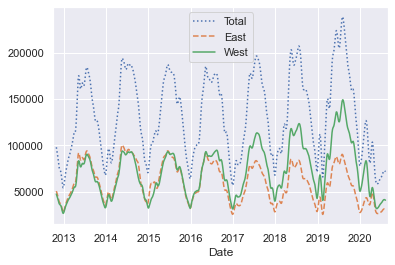

In [11]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [16]:
data.groupby(data.index.time).mean() # agrupamos por horas y calculamos la agregación (media) calculada entre todos los días

,Total,East,West
00:00:00,11.304902,4.791541,6.513360
01:00:00,5.984074,2.680764,3.303309
02:00:00,3.938453,1.890032,2.048421
03:00:00,2.903557,1.493895,1.409662
04:00:00,6.487878,3.440807,3.047071
05:00:00,25.589630,15.619182,9.970448
06:00:00,89.945496,54.047779,35.897717
07:00:00,227.002831,140.801982,86.200849
08:00:00,322.147231,189.640241,132.506990
09:00:00,188.577093,102.221101,86.355992


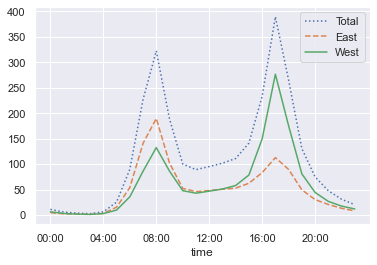

In [17]:
import numpy as np
by_time = data.groupby(data.index.time).mean()

hourly_ticks = 4 * 60 * 60 * np.arange(6) # saltos de 4 horas, 6 puntos diferentes
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

# a las 8:00 hay mucho tráfico del este al oeste y a las 17:00 vuelven del oeste al este

In [19]:
data.index.time # son las horas (time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

           Total       East       West
Date                                  
0     132.039395  58.638527  73.400867
1     140.619442  62.726267  77.893175
2     139.598217  62.306091  77.292126
3     132.737108  59.636035  73.101073
4     120.132101  53.894702  66.237399
5      64.290376  32.242720  32.047656
6      62.537484  31.765849  30.771635
            Total       East       West
Mon    132.039395  58.638527  73.400867
Tues   140.619442  62.726267  77.893175
Wed    139.598217  62.306091  77.292126
Thurs  132.737108  59.636035  73.101073
Fri    120.132101  53.894702  66.237399
Sat     64.290376  32.242720  32.047656
Sun     62.537484  31.765849  30.771635


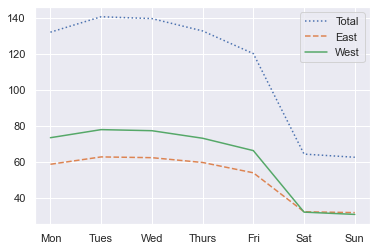

In [21]:
by_weekday = data.groupby(data.index.dayofweek).mean()

print(by_weekday)
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
print(by_weekday)
by_weekday.plot(style=[':', '--', '-'])

# el sábado y el domingo no hay ciclistas al trabajo

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [38]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend[70:75]

array(['Weekday', 'Weekday', 'Weekend', 'Weekend', 'Weekend'], dtype='<U7')

In [39]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')

by_time = data.groupby([weekend, data.index.time]).mean()

by_time

Total        East        West
Weekday 00:00:00    9.457766    4.056725    5.401040
        01:00:00    4.685410    2.105772    2.579638
        02:00:00    3.124102    1.540253    1.583849
        03:00:00    2.684667    1.400297    1.284370
        04:00:00    7.548427    4.185286    3.363141
        05:00:00   32.884815   20.301214   12.583602
        06:00:00  119.124102   72.465940   46.658162
        07:00:00  304.762200  190.401784  114.360416
        08:00:00  426.898935  252.931880  173.967055
        09:00:00  231.165056  125.983147  105.181908
        10:00:00  100.296159   52.005700   48.290458
        11:00:00   76.339281   39.444857   36.894424
        12:00:00   79.305576   39.797274   39.508302
        13:00:00   85.723309   41.936587   43.786723
        14:00:00   97.395937   44.588949   52.806987
        15:00:00  140.262884   58.340436   81.922448
        16:00:00  273.199950   90.102577  183.097374
        17:00:00  500.728444  135.932607  364.795837
        18:00:00  336.802279  108.514866  228.287413
        19:00:00  159.925917   58.199950  101.725966
        20:00:00   88.395937   34.831021   53.564916
        21:00:00   55.300793   23.790882   31.509911
        22:00:00   34.888503   14.838206   20.050297
        23:00:00   21.797324    8.888008   12.909316
Weekend 00:00:00   15.925031    6.629492    9.295539
        01:00:00    9.232342    4.118959    5.113383
        02:00:00    5.991880    2.772017    3.219863
        03:00:00    3.451053    1.728005    1.723048
        04:00:00    3.835192    1.578686    2.256506
        05:00:00    7.342627    3.908302    3.434325
        06:00:00   16.962825    7.979554    8.983271
        07:00:00   32.508055   16.741016   15.767038
        08:00:00   60.138166   31.332714   28.805452
        09:00:00   82.107187   42.815985   39.291202
        10:00:00  100.466543   53.307931   47.158612
        11:00:00  121.429988   62.970880   58.459108
        12:00:00  135.104089   69.325898   65.778191
        13:00:00  142.465923   72.584882   69.881041
        14:00:00  145.470880   74.059480   71.411400
        15:00:00  143.983891   73.043371   70.940520
        16:00:00  132.460347   66.864932   65.595415
        17:00:00  110.272615   55.041512   55.231103
        18:00:00   84.885378   42.539033   42.346344
        19:00:00   57.275093   28.172243   29.102850
        20:00:00   41.561338   19.641264   21.920074
        21:00:00   29.341388   13.668525   15.672862
        22:00:00   21.982652    9.896530   12.086121
        23:00:00   17.284387    7.148079   10.136307

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

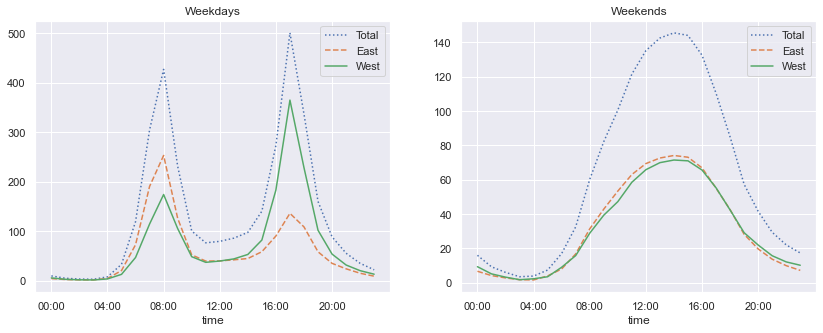

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).

In [ ]:
# entre semana la gente va a trabajar y en el fin de semana pedalean por ocio